In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [65]:
# Reading the training file
RawData1= pd.read_csv('DengAI_Predicting_Disease_Spread_-_Training_Data_Features.csv')

In [67]:
TestData = pd.read_csv('DengAI_Predicting_Disease_Spread_-_Test_Data_Features.csv')

In [68]:
#looking mean, count, Standard deviation and other details
RawData1.describe()

year   weekofyear      ndvi_ne      ndvi_nw      ndvi_se  \
count  1456.000000  1456.000000  1262.000000  1404.000000  1434.000000   
mean   2001.031593    26.503434     0.142294     0.130553     0.203783   
std       5.408314    15.019437     0.140531     0.119999     0.073860   
min    1990.000000     1.000000    -0.406250    -0.456100    -0.015533   
25%    1997.000000    13.750000     0.044950     0.049217     0.155087   
50%    2002.000000    26.500000     0.128817     0.121429     0.196050   
75%    2005.000000    39.250000     0.248483     0.216600     0.248846   
max    2010.000000    53.000000     0.508357     0.454429     0.538314   

           ndvi_sw  precipitation_amt_mm  reanalysis_air_temp_k  \
count  1434.000000           1443.000000            1446.000000   
mean      0.202305             45.760388             298.701852   
std       0.083903             43.715537               1.362420   
min      -0.063457              0.000000             294.635714   
25%       0.144209              9.800000             297.658929   
50%       0.189450             38.340000             298.646429   
75%       0.246982             70.235000             299.833571   
max       0.546017            390.600000             302.200000   

       reanalysis_avg_temp_k  reanalysis_dew_point_temp_k  ...  \
count            1446.000000                  1446.000000  ...   
mean              299.225578                   295.246356  ...   
std                 1.261715                     1.527810  ...   
min               294.892857                   289.642857  ...   
25%               298.257143                   294.118929  ...   
50%               299.289286                   295.640714  ...   
75%               300.207143                   296.460000  ...   
max               302.928571                   298.450000  ...   

       reanalysis_precip_amt_kg_per_m2  reanalysis_relative_humidity_percent  \
count                      1446.000000                           1446.000000   
mean                         40.151819                             82.161959   
std                          43.434399                              7.153897   
min                           0.000000                             57.787143   
25%                          13.055000                             77.177143   
50%                          27.245000                             80.301429   
75%                          52.200000                             86.357857   
max                         570.500000                             98.610000   

       reanalysis_sat_precip_amt_mm  reanalysis_specific_humidity_g_per_kg  \
count                   1443.000000                            1446.000000   
mean                      45.760388                              16.746427   
std                       43.715537                               1.542494   
min                        0.000000                              11.715714   
25%                        9.800000                              15.557143   
50%                       38.340000                              17.087143   
75%                       70.235000                              17.978214   
max                      390.600000                              20.461429   

       reanalysis_tdtr_k  station_avg_temp_c  station_diur_temp_rng_c  \
count        1446.000000         1413.000000              1413.000000   
mean            4.903754           27.185783                 8.059328   
std             3.546445            1.292347                 2.128568   
min             1.357143           21.400000                 4.528571   
25%             2.328571           26.300000                 6.514286   
50%             2.857143           27.414286                 7.300000   
75%             7.625000           28.157143                 9.566667   
max            16.028571           30.800000                15.800000   

       station_max_temp_c  station_min_temp_c  station_precip_mm  

In [69]:
RawData1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1456 entries, 0 to 1455
Data columns (total 24 columns):
city                                     1456 non-null object
year                                     1456 non-null int64
weekofyear                               1456 non-null int64
week_start_date                          1456 non-null object
ndvi_ne                                  1262 non-null float64
ndvi_nw                                  1404 non-null float64
ndvi_se                                  1434 non-null float64
ndvi_sw                                  1434 non-null float64
precipitation_amt_mm                     1443 non-null float64
reanalysis_air_temp_k                    1446 non-null float64
reanalysis_avg_temp_k                    1446 non-null float64
reanalysis_dew_point_temp_k              1446 non-null float64
reanalysis_max_air_temp_k                1446 non-null float64
reanalysis_min_air_temp_k                1446 non-null float64
reanalysis_precip

In [31]:
#Importing Total number of cases from the Total cases file
dn_cases= pd.read_csv('DengAI_Predicting_Disease_Spread_-_Training_Data_Labels.csv')
dn_cases.head(10)

city  year  weekofyear  total_cases
0   sj  1990          18            4
1   sj  1990          19            5
2   sj  1990          20            4
3   sj  1990          21            3
4   sj  1990          22            6
5   sj  1990          23            2
6   sj  1990          24            4
7   sj  1990          25            5
8   sj  1990          26           10
9   sj  1990          27            6

In [32]:
# Importing the Total Number of cases 
RawData['Total_Cases'] = dn_cases['total_cases']
RawData.head(10)

city  year  weekofyear week_start_date   ndvi_ne   ndvi_nw   ndvi_se  \
0   sj  1990          18      1990-04-30  0.122600  0.103725  0.198483   
1   sj  1990          19      1990-05-07  0.169900  0.142175  0.162357   
2   sj  1990          20      1990-05-14  0.032250  0.172967  0.157200   
3   sj  1990          21      1990-05-21  0.128633  0.245067  0.227557   
4   sj  1990          22      1990-05-28  0.196200  0.262200  0.251200   
5   sj  1990          23      1990-06-04       NaN  0.174850  0.254314   
6   sj  1990          24      1990-06-11  0.112900  0.092800  0.205071   
7   sj  1990          25      1990-06-18  0.072500  0.072500  0.151471   
8   sj  1990          26      1990-06-25  0.102450  0.146175  0.125571   
9   sj  1990          27      1990-07-02       NaN  0.121550  0.160683   

    ndvi_sw  precipitation_amt_mm  reanalysis_air_temp_k  ...  \
0  0.177617                 12.42             297.572857  ...   
1  0.155486                 22.82             298.211429  ...   
2  0.170843                 34.54             298.781429  ...   
3  0.235886                 15.36             298.987143  ...   
4  0.247340                  7.52             299.518571  ...   
5  0.181743                  9.58             299.630000  ...   
6  0.210271                  3.48             299.207143  ...   
7  0.133029                151.12             299.591429  ...   
8  0.123600                 19.32             299.578571  ...   
9  0.202567                 14.41             300.154286  ...   

   reanalysis_relative_humidity_percent  reanalysis_sat_precip_amt_mm  \
0                             73.365714                         12.42   
1                             77.368571                         22.82   
2                             82.052857                         34.54   
3                             80.337143                         15.36   
4                             80.460000                          7.52   
5                             79.891429                          9.58   
6                             82.000000                          3.48   
7                             83.375714                        151.12   
8                             82.768571                         19.32   
9                             81.281429                         14.41   

   reanalysis_specific_humidity_g_per_kg  reanalysis_tdtr_k  \
0                              14.012857           2.628571   
1                              15.372857           2.371429   
2                              16.848571           2.300000   
3                              16.672857           2.428571   
4                              17.210000           3.014286   
5                              17.212857           2.100000   
6                              17.234286           2.042857   
7                              17.977143           1.571429   
8                              17.790000           1.885714   
9                              18.071429           2.014286   

   station_avg_temp_c  station_diur_temp_rng_c  station_max_temp_c  \
0           25.442857                 6.900000                29.4   
1           26.714286                 6.371429                31.7   
2           26.714286                 6.485714                32.2   
3           27.471429                 6.771429                33.3   
4           28.942857                 9.371429                35.0   
5           28.114286                 6.942857                34.4   
6           27.414286                 6.771429                32.2   
7           28.371429                 7.685714                33.9   
8           28.328571                 7.385714                33.9   
9           28.328571                 6.514286                33.9   

   station_min_temp_c  station_precip_mm  Total_Cases  
0                20.0               16.0            4  
1                22.2                8.6            5  
2                22.8             

In [33]:
# Spliting the  Cities, San Juan and Iquitos.
#dn_sj represents San Juan
dn_sj = RawData[RawData['city']=='sj']
dn_sj.tail(5)

city  year  weekofyear week_start_date  ndvi_ne   ndvi_nw   ndvi_se  \
931   sj  2008          13      2008-03-25  0.07785 -0.039900  0.310471   
932   sj  2008          14      2008-04-01 -0.03800 -0.016833  0.119371   
933   sj  2008          15      2008-04-08 -0.15520 -0.052750  0.137757   
934   sj  2008          16      2008-04-15  0.00180       NaN  0.203900   
935   sj  2008          17      2008-04-22 -0.03700 -0.010367  0.077314   

      ndvi_sw  precipitation_amt_mm  reanalysis_air_temp_k  ...  \
931  0.296243                 27.19             296.958571  ...   
932  0.066386                  3.82             298.081429  ...   
933  0.141214                 16.96             297.460000  ...   
934  0.209843                  0.00             297.630000  ...   
935  0.090586                  0.00             298.672857  ...   

     reanalysis_relative_humidity_percent  reanalysis_sat_precip_amt_mm  \
931                             74.247143                         27.19   
932                             74.600000                          3.82   
933                             75.027143                         16.96   
934                             72.285714                          0.00   
935                             76.960000                          0.00   

     reanalysis_specific_humidity_g_per_kg  reanalysis_tdtr_k  \
931                              13.644286           2.885714   
932                              14.662857           2.714286   
933                              14.184286           2.185714   
934                              13.858571           2.785714   
935                              15.671429           3.957143   

     station_avg_temp_c  station_diur_temp_rng_c  station_max_temp_c  \
931           25.042857                 5.785714                30.0   
932           26.242857                 6.814286                30.6   
933           25.000000                 5.714286                29.4   
934           25.314286                 6.242857                29.4   
935           27.042857                 7.514286                31.7   

     station_min_temp_c  station_precip_mm  Total_Cases  
931                21.1                1.8            4  
932                22.2                0.5            3  
933                21.7               30.7            1  
934                21.7               11.2            3  
935                23.3                0.3            5  

[5 rows x 25 columns]

In [34]:
#dn_iq represents Iquitos
dn_iq = RawData[RawData['city']=='iq']
dn_iq.head(5)

city  year  weekofyear week_start_date   ndvi_ne   ndvi_nw   ndvi_se  \
936   iq  2000          26      2000-07-01  0.192886  0.132257  0.340886   
937   iq  2000          27      2000-07-08  0.216833  0.276100  0.289457   
938   iq  2000          28      2000-07-15  0.176757  0.173129  0.204114   
939   iq  2000          29      2000-07-22  0.227729  0.145429  0.254200   
940   iq  2000          30      2000-07-29  0.328643  0.322129  0.254371   

      ndvi_sw  precipitation_amt_mm  reanalysis_air_temp_k  ...  \
936  0.247200                 25.41             296.740000  ...   
937  0.241657                 60.61             296.634286  ...   
938  0.128014                 55.52             296.415714  ...   
939  0.200314                  5.60             295.357143  ...   
940  0.361043                 62.76             296.432857  ...   

     reanalysis_relative_humidity_percent  reanalysis_sat_precip_amt_mm  \
936                             92.418571                         25.41   
937                             93.581429                         60.61   
938                             95.848571                         55.52   
939                             87.234286                          5.60   
940                             88.161429                         62.76   

     reanalysis_specific_humidity_g_per_kg  reanalysis_tdtr_k  \
936                              16.651429           8.928571   
937                              16.862857          10.314286   
938                              17.120000           7.385714   
939                              14.431429           9.114286   
940                              15.444286           9.500000   

     station_avg_temp_c  station_diur_temp_rng_c  station_max_temp_c  \
936           26.400000                10.775000                32.5   
937           26.900000                11.566667                34.0   
938           26.800000                11.466667                33.0   
939           25.766667                10.533333                31.5   
940           26.600000                11.480000                33.3   

     station_min_temp_c  station_precip_mm  Total_Cases  
936                20.7                3.0            0  
937                20.8               55.6            0  
938                20.7               38.1            0  
939                14.7               30.0            0  
940                19.1                4.0            0  

[5 rows x 25 columns]

In [35]:
#Filling the NULL values for San Juan city with the mean of each column
dn_sj = dn_sj.fillna(value=dn_sj.mean())
dn_sj.head(5)

city  year  weekofyear week_start_date   ndvi_ne   ndvi_nw   ndvi_se  \
0   sj  1990          18      1990-04-30  0.122600  0.103725  0.198483   
1   sj  1990          19      1990-05-07  0.169900  0.142175  0.162357   
2   sj  1990          20      1990-05-14  0.032250  0.172967  0.157200   
3   sj  1990          21      1990-05-21  0.128633  0.245067  0.227557   
4   sj  1990          22      1990-05-28  0.196200  0.262200  0.251200   

    ndvi_sw  precipitation_amt_mm  reanalysis_air_temp_k  ...  \
0  0.177617                 12.42             297.572857  ...   
1  0.155486                 22.82             298.211429  ...   
2  0.170843                 34.54             298.781429  ...   
3  0.235886                 15.36             298.987143  ...   
4  0.247340                  7.52             299.518571  ...   

   reanalysis_relative_humidity_percent  reanalysis_sat_precip_amt_mm  \
0                             73.365714                         12.42   
1                             77.368571                         22.82   
2                             82.052857                         34.54   
3                             80.337143                         15.36   
4                             80.460000                          7.52   

   reanalysis_specific_humidity_g_per_kg  reanalysis_tdtr_k  \
0                              14.012857           2.628571   
1                              15.372857           2.371429   
2                              16.848571           2.300000   
3                              16.672857           2.428571   
4                              17.210000           3.014286   

   station_avg_temp_c  station_diur_temp_rng_c  station_max_temp_c  \
0           25.442857                 6.900000                29.4   
1           26.714286                 6.371429                31.7   
2           26.714286                 6.485714                32.2   
3           27.471429                 6.771429                33.3   
4           28.942857                 9.371429                35.0   

   station_min_temp_c  station_precip_mm  Total_Cases  
0                20.0               16.0            4  
1                22.2                8.6            5  
2                22.8               41.4            4  
3                23.3                4.0            3  
4                23.9                5.8            6  

[5 rows x 25 columns]

In [36]:
#Filling the NULL values for the city Iquitos with the mean of each column
dn_iq = dn_iq.fillna(value=dn_iq.mean())
dn_iq.head(5)

city  year  weekofyear week_start_date   ndvi_ne   ndvi_nw   ndvi_se  \
936   iq  2000          26      2000-07-01  0.192886  0.132257  0.340886   
937   iq  2000          27      2000-07-08  0.216833  0.276100  0.289457   
938   iq  2000          28      2000-07-15  0.176757  0.173129  0.204114   
939   iq  2000          29      2000-07-22  0.227729  0.145429  0.254200   
940   iq  2000          30      2000-07-29  0.328643  0.322129  0.254371   

      ndvi_sw  precipitation_amt_mm  reanalysis_air_temp_k  ...  \
936  0.247200                 25.41             296.740000  ...   
937  0.241657                 60.61             296.634286  ...   
938  0.128014                 55.52             296.415714  ...   
939  0.200314                  5.60             295.357143  ...   
940  0.361043                 62.76             296.432857  ...   

     reanalysis_relative_humidity_percent  reanalysis_sat_precip_amt_mm  \
936                             92.418571                         25.41   
937                             93.581429                         60.61   
938                             95.848571                         55.52   
939                             87.234286                          5.60   
940                             88.161429                         62.76   

     reanalysis_specific_humidity_g_per_kg  reanalysis_tdtr_k  \
936                              16.651429           8.928571   
937                              16.862857          10.314286   
938                              17.120000           7.385714   
939                              14.431429           9.114286   
940                              15.444286           9.500000   

     station_avg_temp_c  station_diur_temp_rng_c  station_max_temp_c  \
936           26.400000                10.775000                32.5   
937           26.900000                11.566667                34.0   
938           26.800000                11.466667                33.0   
939           25.766667                10.533333                31.5   
940           26.600000                11.480000                33.3   

     station_min_temp_c  station_precip_mm  Total_Cases  
936                20.7                3.0            0  
937                20.8               55.6            0  
938                20.7               38.1            0  
939                14.7               30.0            0  
940                19.1                4.0            0  

[5 rows x 25 columns]

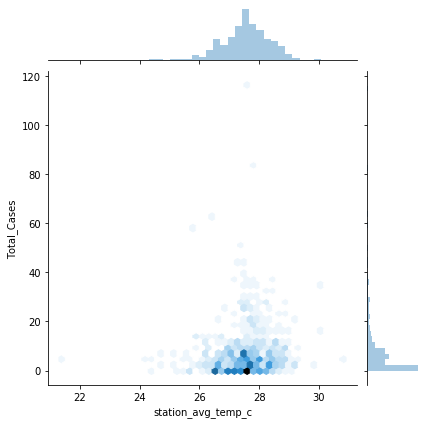

In [37]:
sns.jointplot(x = 'station_avg_temp_c', y = 'Total_Cases', data = dn_iq, kind = 'hex')

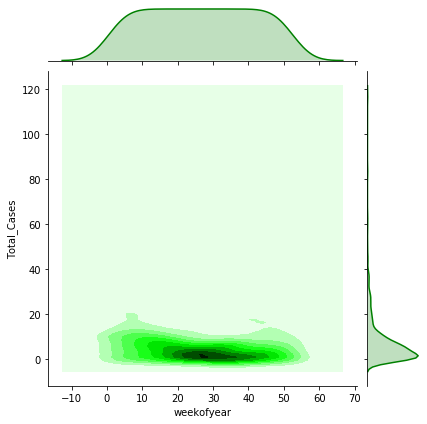

In [38]:
sns.jointplot(x = 'weekofyear', y = 'Total_Cases', data = dn_iq, color = 'green', kind = 'kde')

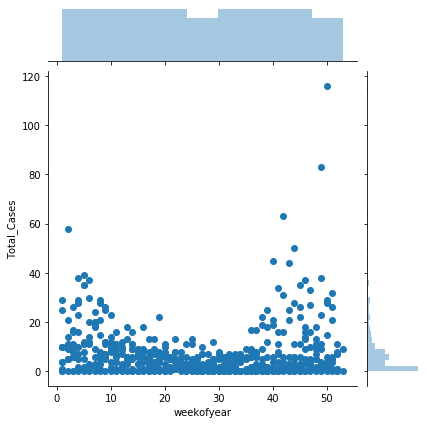

In [39]:
sns.jointplot(x = 'weekofyear', y = 'Total_Cases', data = dn_iq)

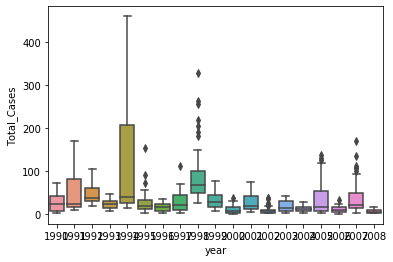

In [40]:
sns.boxplot(x='year', y = 'Total_Cases', data = dn_sj)

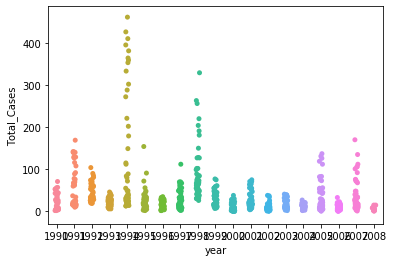

In [16]:
sns.stripplot(x='year', y = 'Total_Cases', data = dn_sj)

# 

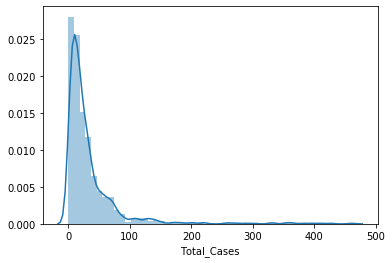

In [41]:
sns.distplot(dn_sj['Total_Cases'])

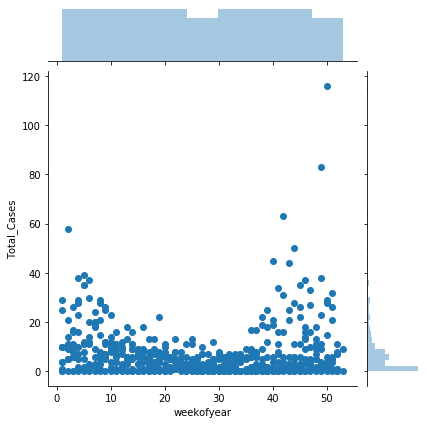

In [18]:
sns.jointplot(data = dn_iq, x = 'weekofyear', y = 'Total_Cases')

C:\Users\niahmad\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\core\_methods.py:140: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
C:\Users\niahmad\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\core\_methods.py:132: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\niahmad\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\niahmad\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


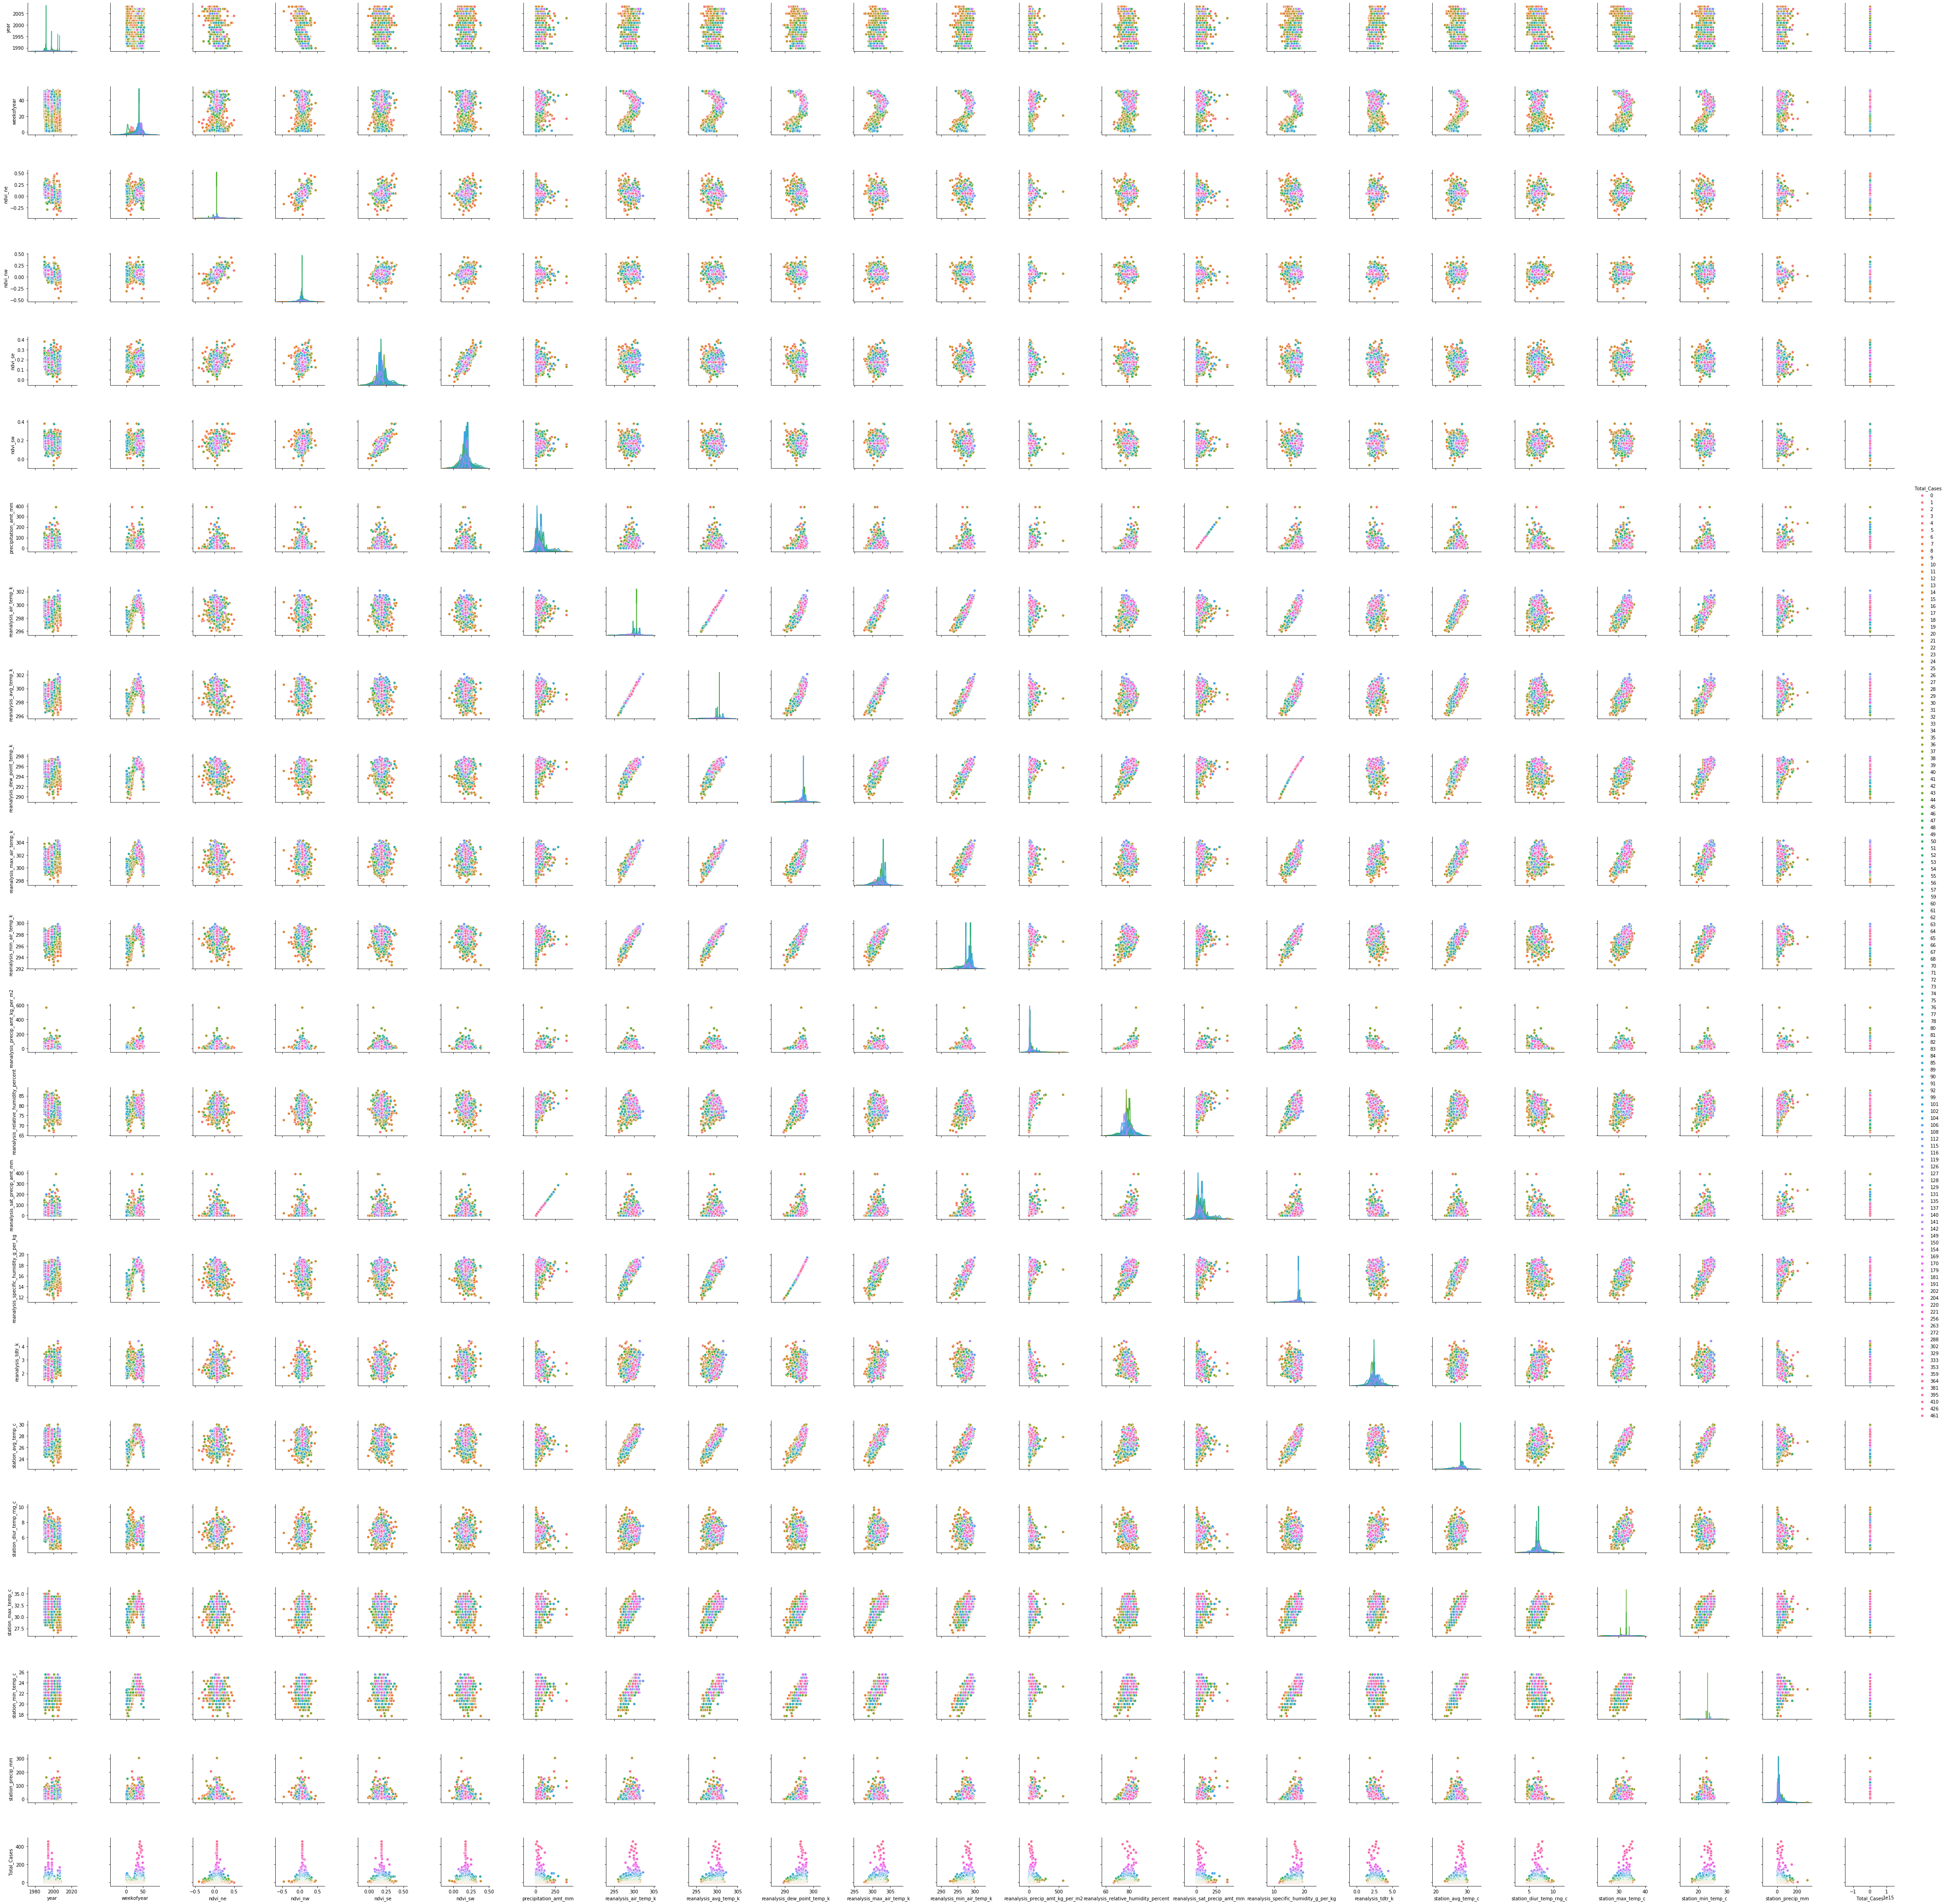

In [20]:
sns.pairplot(dn_sj, hue = 'Total_Cases')

Text(0, 0.5, 'Frequency')

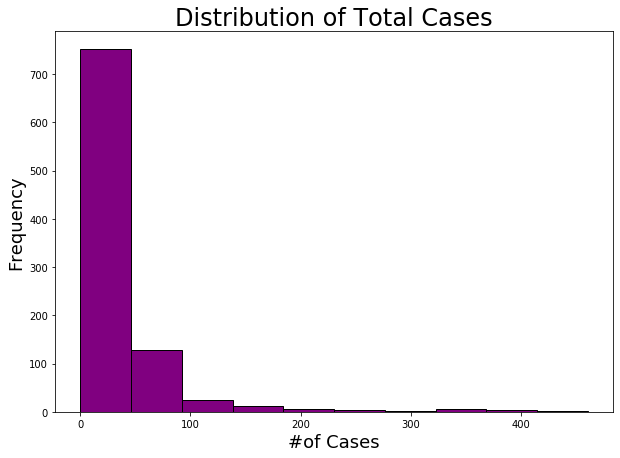

In [42]:
dn_sj.Total_Cases.plot(kind='hist', color='purple', edgecolor='black', figsize=(10,7))
plt.title('Distribution of Total Cases', size=24)
plt.xlabel('#of Cases', size=18)
plt.ylabel('Frequency', size=18)

In [ ]:
hm = dn_sj.pivot_table(index = 'weekofyear', columns = ['station_avg_temp_c','station_precip_mm'], values = 'Total_Cases')

In [43]:
plt.rcParams['figure.figsize'] = (12,8)
sns.heatmap(hm)

NameError: name 'hm' is not defined

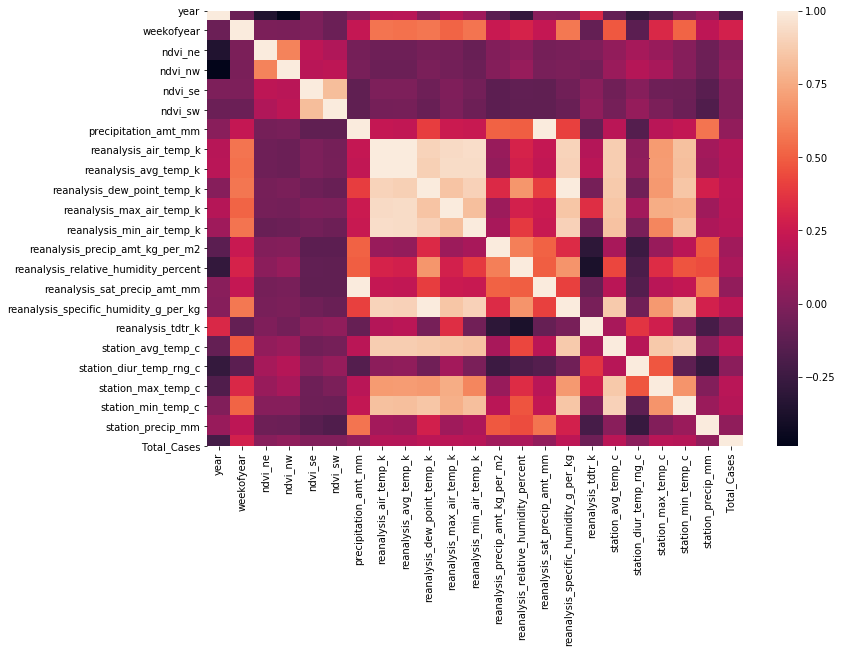

In [44]:
sns.heatmap(dn_sj.corr())

In [45]:
#Since we are predicting the Total Cases we are droping the Totaol_cases column as this will be "Y" value
x1 = dn_sj.drop(['Total_Cases'], axis = 1).values
x1

array([['sj', 1990, 18, ..., 29.4, 20.0, 16.0],
       ['sj', 1990, 19, ..., 31.7, 22.2, 8.6],
       ['sj', 1990, 20, ..., 32.2, 22.8, 41.4],
       ...,
       ['sj', 2008, 15, ..., 29.4, 21.7, 30.7],
       ['sj', 2008, 16, ..., 29.4, 21.7, 11.2],
       ['sj', 2008, 17, ..., 31.7, 23.3, 0.3]], dtype=object)

In [46]:
#WE are removing the Yean and City Column as they do mot hae any correlation with the rest of the data
x = np.delete(x1,[0,3],1)
x = np.delete(x,0,1)
x

array([[18, 0.1226, 0.103725, ..., 29.4, 20.0, 16.0],
       [19, 0.1699, 0.142175, ..., 31.7, 22.2, 8.6],
       [20, 0.03225, 0.1729667, ..., 32.2, 22.8, 41.4],
       ...,
       [15, -0.1552, -0.05275, ..., 29.4, 21.7, 30.7],
       [16, 0.0018, 0.06746906815219837, ..., 29.4, 21.7, 11.2],
       [17, -0.037000000000000005, -0.01036667, ..., 31.7, 23.3, 0.3]],
      dtype=object)

In [47]:
# We are assigning the Y values to the Total Cases as we need to train the Data for running the model on TEST dataset
y = dn_sj['Total_Cases'].values

In [48]:
y

array([  4,   5,   4,   3,   6,   2,   4,   5,  10,   6,   8,   2,   6,
        17,  23,  13,  21,  28,  24,  20,  40,  27,  42,  33,  43,  37,
        57,  71,  44,  56,  53,  52,  47,  26,  27,  21,  21,  26,  34,
        37,  17,  19,  25,  18,  21,  17,  17,  16,  16,  15,  23,  16,
        17,  12,  17,  10,  15,  19,  21,  14,  18,  13,  14,  18,  23,
        25,  62,  60,  76,  66,  64,  68,  89,  92, 140, 116, 142, 129,
       140, 140, 127, 129, 169, 141, 108,  78,  70,  81, 104,  90,  85,
        55,  53,  65,  33,  38,  59,  40,  37,  29,  30,  30,  28,  23,
        24,  29,  26,  23,  20,  19,  20,  26,  29,  31,  28,  26,  32,
        35,  33,  30,  52,  59,  67,  65,  74,  70,  61,  53,  76,  61,
        57,  44,  34,  47,  60,  60,  53,  36,  31,  30,  32,  28,  33,
        33,  35,  22,  13,  13,  21,  17,  11,   8,   8,   6,   6,   7,
        12,  17,  10,  10,  18,  19,  12,  22,  12,  21,  18,  16,  16,
        22,  17,  25,  23,  12,  25,  28,  27,  18,  23,  23,  2

In [180]:
import statsmodels.formula.api as smf
model = smf.ols("""Total_Cases ~ ndvi_ne + ndvi_nw + ndvi_se + ndvi_sw + precipitation_amt_mm + 
reanalysis_air_temp_k + reanalysis_avg_temp_k + reanalysis_dew_point_temp_k + reanalysis_max_air_temp_k +
reanalysis_min_air_temp_k + reanalysis_precip_amt_kg_per_m2 + reanalysis_relative_humidity_percent + 
reanalysis_sat_precip_amt_mm + reanalysis_specific_humidity_g_per_kg + reanalysis_tdtr_k +
station_avg_temp_c + station_diur_temp_rng_c + station_max_temp_c + station_min_temp_c + station_precip_mm""",
                data= dn_sj).fit()

In [181]:
model.params

Intercept                                5985.636813
ndvi_ne                                    -1.781055
ndvi_nw                                    15.389848
ndvi_se                                     8.826240
ndvi_sw                                    -9.584717
precipitation_amt_mm                       -0.037868
reanalysis_air_temp_k                      81.887225
reanalysis_avg_temp_k                     -45.629828
reanalysis_dew_point_temp_k               -81.979681
reanalysis_max_air_temp_k                  16.550163
reanalysis_min_air_temp_k                   3.586864
reanalysis_precip_amt_kg_per_m2             0.055036
reanalysis_relative_humidity_percent       10.186222
reanalysis_sat_precip_amt_mm               -0.037868
reanalysis_specific_humidity_g_per_kg      34.305130
reanalysis_tdtr_k                         -17.577365
station_avg_temp_c                         -5.230944
station_diur_temp_rng_c                     3.896681
station_max_temp_c                          3.

In [94]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Total_Cases   R-squared:                       0.082
Model:                            OLS   Adj. R-squared:                  0.063
Method:                 Least Squares   F-statistic:                     4.334
Date:                Mon, 22 Feb 2021   Prob (F-statistic):           2.20e-09
Time:                        18:46:13   Log-Likelihood:                -4974.5
No. Observations:                 936   AIC:                             9989.
Df Residuals:                     916   BIC:                         1.009e+04
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
Intercept                              5985.6368   6973.012      0.858      0.391   -7699.298    1.97e+04
ndvi_ne                                  -1.7811     22.011     -0.081      0.936     -44.978      41.416
ndvi_nw                                  15.3898     24.003      0.641      0.522     -31.718      62.498
ndvi_se                                   8.8262     52.450      0.168      0.866     -94.110     111.762
ndvi_sw                                  -9.5847     53.376     -0.180      0.858    -114.338      95.169
precipitation_amt_mm                     -0.0379      0.025     -1.502      0.133      -0.087       0.012
reanalysis_air_temp_k                    81.8872     88.725      0.923      0.356     -92.240     256.015
reanalysis_avg_temp_k                   -45.6298     22.052     -2.069      0.039     -88.908      -2.351
reanalysis_dew_point_temp_k             -81.9797     82.581     -0.993      0.321    -244.049      80.089
reanalysis_max_air_temp_k                16.5502      5.317      3.113      0.002       6.115      26.985
reanalysis_min_air_temp_k                 3.5869      5.473      0.655      0.512      -7.155      14.329
reanalysis_precip_amt_kg_per_m2           0.0550      0.067      0.827      0.408      -0.076       0.186
reanalysis_relative_humidity_percent     10.1862     18.310      0.556      0.578     -25.749      46.121
reanalysis_sat_precip_amt_mm             -0.0379      0.025     -1.502      0.133      -0.087       0.012
reanalysis_specific_humidity_g_per_kg    34.3051     23.123      1.484      0.138     -11.074      79.685
reanalysis_tdtr_k                       -17.5774      5.792     -3.035      0.002     -28.945      -6.210
station_avg_temp_c                       -5.2309      5.579     -0.938      0.349     -16.180       5.718
station_diur_temp_rng_c                   3.8967      3.475      1.122      0.262      -2.922      10.716
station_max_temp_c                        3.0660      2.854      1.074      0.283      -2.535       8.667
station_min_temp_c                        1.7572      3.426      0.513      0.608      -4.967       8.481
station_precip_mm                        -0.0106      0.076     -0.140      0.889      -0.159       0.138
==============================================================================
Omnibus:                      866.510   Durbin-Watson:                   0.139
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            26510.640
Skew:                           4.317   Prob(JB):                         0.00
Kurtosis:                      27.601   Cond. No.                     3.95e+17
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix 

In [56]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.3)

In [57]:
from sklearn.linear_model import LinearRegression
ml = LinearRegression()
ml.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [61]:
y_pred=ml.predict(x_test)
y_pred

array([40.06731838, 40.08189397, 18.66562969, 11.68259016, 17.38480362,
       43.85813128, 57.69935123, 54.16901772, 50.82214028, 48.99482562,
       42.50360872, 38.30931916, 41.13605483, 65.57170506, 57.87061989,
       11.84100918, 33.07729669, 46.96062607, 13.14135058, 20.54962053,
       -0.84394445, 41.01587869, 65.29841943,  9.64265356, 40.19568692,
       52.56794201, 10.9262079 , 49.95612727, 20.7860693 , 27.89597988,
       20.42590067, 22.79238668, 37.37028439, 10.00909862, 56.85382481,
       21.92230692, 18.10787033, 20.199531  , 39.37572694, 43.18722333,
       45.50167162, 42.9019049 , 63.06042928, 16.48822914, 66.79794621,
       42.74147894, 21.18723756, 63.70176644, 41.73398448, 36.57894545,
       31.82230732, 48.14930174, 17.10490742,  8.56103157, 21.49935362,
       38.93033819, 54.97493319,  3.49318507, 18.42636762, 29.03098939,
       34.25621446, 56.16561428, 21.8822573 , 17.12965826, 22.30575954,
       20.27469181, 34.22964998, 76.10477852,  2.674692  , 46.39

In [62]:
(y_test)

array([ 17,  76,  38,  31,  28,   6,  38, 112, 108,  25,  16,  14,  21,
       461,  30,   2,  17,  20,  16,   7,  17,  18,  40,  29,  47,  15,
         6,  66,   4,   7,   0,   5,   3,  38,  43, 131,  25,   7,   4,
        70,  38,  14, 359,  11,  48,  72,   1,  40,  13, 112,   7,  29,
         6,   9,   6,   6,  19,  12,  14,  12,  22,  48,   5,  15,  13,
        37,   6, 364,  14,   5,  35,  71,   4,  48, 272,  52,   3,  39,
        18,   5,  18,   5,   6,  15,  33,  12,   6,  91,  33,  28,  26,
        25,  75,  28,  62,  10,   8,  21, 115,  10,   9,   1, 106,  17,
        30,  14,  65,   4,  47,  70,  26,   3,  16,  16,  17,  12,  15,
        19,   2, 102,   7,  13,  37,  80,   5,   2,  64,  89, 104,  13,
        64,  14,   1,  17,   2,  27,   9,  33,  20,   6,  10,  10,  34,
        17,   1,   3,  16,  32,  25,   3,  16,  35,   3,  11,  26,  31,
         2,  70,  13,  30,  30,  21,  51,  11,   8,  37,   4,  14,  26,
        16,  25,   3,  82, 142,  67,  16,  12,  60,  19,  16,   

In [185]:
#sns.boxplot(x='year', y = 'round_to_tenths', data = dn_sj)

In [186]:
Final = y_pred

In [187]:
a = 7.6+5.68
a

13.28

In [151]:
round(a,1)

13.3

In [152]:
round_to_tenths = [round(num, 0) for num in y_pred]
round_to_tenths 

[26.0,
 18.0,
 41.0,
 23.0,
 37.0,
 48.0,
 38.0,
 31.0,
 27.0,
 17.0,
 51.0,
 50.0,
 -19.0,
 31.0,
 15.0,
 50.0,
 48.0,
 24.0,
 50.0,
 48.0,
 42.0,
 47.0,
 26.0,
 36.0,
 60.0,
 59.0,
 40.0,
 -8.0,
 39.0,
 40.0,
 39.0,
 8.0,
 41.0,
 52.0,
 47.0,
 38.0,
 10.0,
 32.0,
 43.0,
 34.0,
 29.0,
 35.0,
 41.0,
 36.0,
 28.0,
 22.0,
 45.0,
 37.0,
 14.0,
 18.0,
 42.0,
 39.0,
 53.0,
 47.0,
 15.0,
 53.0,
 36.0,
 21.0,
 32.0,
 25.0,
 15.0,
 51.0,
 3.0,
 41.0,
 37.0,
 45.0,
 51.0,
 39.0,
 17.0,
 3.0,
 2.0,
 8.0,
 7.0,
 54.0,
 57.0,
 52.0,
 6.0,
 19.0,
 62.0,
 27.0,
 21.0,
 54.0,
 53.0,
 -2.0,
 13.0,
 29.0,
 47.0,
 58.0,
 21.0,
 9.0,
 34.0,
 35.0,
 15.0,
 9.0,
 -2.0,
 56.0,
 52.0,
 17.0,
 21.0,
 18.0,
 9.0,
 51.0,
 41.0,
 32.0,
 44.0,
 51.0,
 44.0,
 13.0,
 25.0,
 49.0,
 39.0,
 42.0,
 11.0,
 15.0,
 15.0,
 46.0,
 -0.0,
 22.0,
 33.0,
 36.0,
 53.0,
 42.0,
 50.0,
 28.0,
 12.0,
 51.0,
 43.0,
 39.0,
 18.0,
 44.0,
 46.0,
 13.0,
 10.0,
 53.0,
 76.0,
 44.0,
 -0.0,
 54.0,
 45.0,
 3.0,
 41.0,
 59.0,
 19.0,
 45.0,
 3

In [153]:
dn_sj.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 936 entries, 0 to 935
Data columns (total 25 columns):
city                                     936 non-null object
year                                     936 non-null int64
weekofyear                               936 non-null int64
week_start_date                          936 non-null object
ndvi_ne                                  936 non-null float64
ndvi_nw                                  936 non-null float64
ndvi_se                                  936 non-null float64
ndvi_sw                                  936 non-null float64
precipitation_amt_mm                     936 non-null float64
reanalysis_air_temp_k                    936 non-null float64
reanalysis_avg_temp_k                    936 non-null float64
reanalysis_dew_point_temp_k              936 non-null float64
reanalysis_max_air_temp_k                936 non-null float64
reanalysis_min_air_temp_k                936 non-null float64
reanalysis_precip_amt_kg_per_m2  

In [63]:
from statsmodels.stats.anova import anova_lm